# Homework Set 10

**Author**: Chase Coleman

**Date**: 28 April 2016

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from numba import jit, vectorize


%matplotlib inline

## Globalization and Synchronization of Innovation Cycles

In this assignment, we were asked to reproduce some of the figures from "Globalization and Synchronization of Innovation Cycles" by Matsuyama, Sushko, and Gardini. In this paper, the authors use pieces from Judd (1985) and Helpman Krugman (1985) to develop a two country model with trade and innovation. As trade costs fall and intercountry competition increases, the innovation incentives become aligned and countries synchronize their innovation cycles. Additionally, this paper introduces the idea of *coupled oscillators* in the context of an economic model -- They are the first to present a model in which the coupled oscillators arise endogenously within the model.

### Model

In this model, time is discrete with $t = 0, 1, \dots$. There are two countries indexed by $j$ (sometimes $k$) with values 1 or 2. In each of the two countries there is a representative household who inelastically supplies labor $L_j$ at the wage rate $w_{j, t}$. Since the countries will be identical except for in labor supplied then without loss of generality we will say $L_{1} \geq L_{2}$. Households consume a single nontradeable final good which is produced competitive by combining two types of tradeable intermediate inputs using Cobb-Douglas technology

$$Y_{k, t} = C_{k, t} = \left( \frac{X^o_{k, t}}{1 - \alpha} \right)^{1-\alpha} \left( \frac{X_{k, t}}{\alpha} \right)^{\alpha}$$

There are two types of goods above: $X^o_{k, t}$ and $X_{k, t}$. $X^o_{k, t}$ is a homogenous input which can be produced using a linear technology that converts a single unit of labor into a single unit of the homogenous good. This good is freely tradeable, competitively supplied, and homogenous across countries. By choosing the price of this good as numeraire, we know that $w_{j, t} \geq 1$ with $w_{j, t} = 1$ whenever country $j$ produces the homogenous input. $X_{k, t}$ is a composite good that consists of many differentiated goods. Namely,

$$X_{k, t}^{1 - \frac{1}{\sigma}} = \int_{\Omega_t} \left[ x_{k, t}(\nu) \right]^{1 - \frac{1}{\sigma}} d \nu$$

where $x_{k, t}(\nu)$ is the total amount of a differentiated good $\nu \in \Omega_t$ that is produced. $\sigma > 1$ is the direct partial elasticity of substitution between a pair of varieties and $\Omega_t$ is the set of varieties available in period $t$. We can split the varieties into those which are supplied competitively and those supplied monopolistically -- $\Omega_t = \Omega_t^c + \Omega_t^m.

We can derive the demand for differentiated inputs as

$$x_{k, t}(\nu) = \left( \frac{p_{k, t}(\nu)}{P_{k, t}} \right)^{-\sigma} \frac{\alpha w_{k, t} L_k}{P_{k, t}}$$

where $p_{k, t}$ is the price of the variety $\nu$ and $P_{k, t}$ is the price index for differentiated inputs in $k$, $\left[ P_{k, t} \right]^{1 - \sigma} = \int_{\Omega_t} [p_{k, t}]^{1-\sigma} d\nu$. The price of a variety also depends on $k$ because shipping varieties between countries incurs an iceberg trade cost $\tau_{j,k}$. Thus the effective price in country $k$ of a variety $\nu$ produced in country $j$ becomes $p_{k, t}(\nu) = \tau_{j,k} p_{j, t}(\nu)$. Using these expressions, we can derive the total demand for each variety to get

$$D_{j, t}(\nu) = \sum_k \tau_{j, k} x_{k, t}(\nu) = \alpha A_{j, t}(p_{j, t}(\nu))^{-\sigma}$$

where $A_{j, t} := \sum_k \frac{\rho_{j, k} w_{k, t} L_{k}}{(P_{k, t})^{1 - \sigma}}$ and $\rho_{j, k} = (\tau_{j, k})^{1 - \sigma} \leq 1$.

Producing one unit of each differentiated variety requires $\psi$ units of labor, thus the marginal cost is equal to $\psi w_{j, t}$ for $\nu \in \Omega_{j, t}$. Additionally, all competitive varieties will have the same price (because of same marginal cost) which means for all $\nu \in \Omega^c$ that

$$p_{j, t}(\nu) = p_{j, t}^c= \psi w_{j, t}$$

and

$$D_{j, t} = y_{j, t}^c = \alpha A_{j, t} (p_{j, t}^c)^{-\sigma}$$

Additionally, monopolists will have the same marked-up price which leads them to sell the same. This means for all $\nu \in \Omega^m$ that

$$p_{j, t}(\nu) = p_{j, t}^m= \frac{\psi w_{j, t}}{1 - \frac{1}{\sigma}}$$

and

$$D_{j, t} = y_{j, t}^m = \alpha A_{j, t} (p_{j, t}^m)^{-\sigma}$$

Define a variable $\theta$ by 

$$\theta = \frac{p_{j, t}^c}{p_{j, t}^m} \frac{y_{j, t}^c}{y_{j, t}^m} = \left(1 - \frac{1}{\sigma} \right)^{1-\sigma}$$

Since competitive varieties are cheaper, more of them will be sold than the monopolistic varieties. We will refer to $N_{j, t}^c$ and $N_{j, t}^m$ as the measure of $\Omega^c$ and $\Omega^m$ respectively.

We allow new firms to introduce varieties to the market. The requirement is that to introduce a new variety, a firm must hire $f$ units of labor per variety in each country. Will use a zero profit condition to pin down the number of firms that enter the market and following Deneckere and Judd they only maintain their monopoly rights for a single period. This means a monopolists profits must be less than or equal to zero in expectation -- If less than zero then no varieties will be introduced

$$\pi_{j, t}^m := (p_{j, t}^m - w_{j, t} \psi) y_{j, t}^m - w_{j, t} f \leq 0$$

To simplify the problem, the authors assume that both countries find it optimal to always produce the homogenous good -- This allows them to use $w_{1, t} = w_{2, t} = 1$ instead of trying to pin it down. They use this to get an equation for the measure of monopolists in every period.

Finally, they introduce an exogenous probability of your variety becoming obsolete. The probability of a firm's variety becoming obsolete is $\delta$. This allows us to write an evolution for the measure of firms by

$$N_{j, t+1}^c = \delta (N_{j, t}^c + N_{j, t}^m) = \delta (N_{j, t}^c + \theta(M_{j, t} - N_{j, t}^c))$$

### Law of Motion for Country Specific Varieties

We will work with a normalized measure of our varieties. Namely,

\begin{align*}
  n_{j, t} &= \frac{\theta \sigma f N_{j, t}^c}{\alpha (L_1 + L_2)} \\
  i_{j, t} &= \frac{\theta \sigma f N_{j, t}^m}{\alpha (L_1 + L_2)} \\
  m_{j, t} &= \frac{\theta \sigma f M_{j, t}}{\alpha (L_1 + L_2)} = n_{j, t} + \frac{i_{j, t}}{\theta}
\end{align*}

We also use $s_j := \frac{L_j}{L_1 + L_2}$.

Given an initial condition, $n_0 = (n_{1, 0}, n_{2, 0}) \in \mathbb{R}_{+}^{2}$, the equilibrium trajectory, $\{ n_t \}_{t=0}^{\infty} = \{ (n_{1, t}, n_{2, t}) \}_{t=0}^{\infty}$, is obtained by iterating the 2D-dynamical system, $n_{t+1} = F(n_t)$ where $F : \mathbb{R}_{+}^{2} \rightarrow \mathbb{R}_{+}^{2}$ given by

\begin{align*}
  F(n_t) &= \begin{cases}
  \big( \delta (\theta s_j(\rho) + (1-\theta) n_{j, t}), \delta (\theta s_j(\rho) + (1-\theta) n_{j, t}) \big) \; &\text{for } n_t \in D_{LL} := \{ (n_1, n_2) \in \mathbb{R}_{+}^{2} | n_j \leq s_j(\rho) \} \\
  \big( \delta n_{1, t}, \delta n_{2, t} \big) \; &\text{for } n_t \in D_{HH} := \{ (n_1, n_2) \in \mathbb{R}_{+}^{2} | n_j \geq h_j(\rho) \} \\
  \big( \delta n_{1, t}, \delta (\theta h_2(n_{1, t}) + (1-\theta) n_{2, t} \big) &\text{for } n_t \in D_{HL} :=  \{ (n_1, n_2) \in \mathbb{R}_{+}^{2} | n_1 \geq s_1(\rho) \wedge n_2 \leq h_2(n_1) \} \\
  \big( \delta (\theta h_1(n_{2, t}) + (1-\theta) n_{1, t}, \delta n_{2, t} \big) &\text{for } n_t \in D_{LH} :=  \{ (n_1, n_2) \in \mathbb{R}_{+}^{2} | n_1 \leq h_1(n_2) \wedge n_2 \geq s_2(\rho) \} \\
  \end{cases}
\end{align*}

where

$$s_1(\rho) = 1 - s_2(\rho) = \min \{ \frac{s_1 - \rho s_2}{1 - \rho}, 1 \}$$

and $h_j(n_k)$ defined implicitly by

$$1 = \frac{s_j}{h_j(n_k) + \rho n_k} + \frac{s_k}{h_j(n_k) + n_k / \rho}$$

Rewriting the equation above gives us a quadratic equation in terms of $h_j(n_k)$. Since we know $h_j(n_k) > 0$ then we can just solve the quadratic equation and return the positive root. This gives us

$$h_j(n_k)^2 + \left( (\rho + \frac{1}{\rho}) n_k - s_j - s_k \right) h_j(n_k) + (n_k^2 - \frac{s_j n_k}{\rho} - s_k n_k \rho) = 0$$

In [94]:
class MSGSync(object):
    """
    The paper "Globalization and Synchronization of Innovation Cycles" presents
    a two country model with endogenous innovation cycles. Combines elements
    from Deneckere Judd (1985) and Helpman Krugman (1985) to allow for a
    model with trade that has firms who can introduce new varieties into
    the economy.

    We focus on being able to determine whether two countries eventually
    synchronize their innovation cycles. To do this, we only need a few
    of the many parameters. In particular, we need the parameters listed
    below

    Parameters
    ----------
    s1 : scalar(Float)
        Amount of total labor in country 1 relative to total worldwide labor
    theta : scalar(Float)
        A measure of how mcuh more of the competitive variety is used in
        production of final goods
    delta : scalar(Float)
        Percentage of firms that are not exogenously destroyed every period
    rho : scalar(Float)
        Measure of how expensive it is to trade between countries
    """
    def __init__(self, s1, theta, delta, rho):
        # Store model parameters
        self.s1, self.theta, self.delta, self.rho = s1, theta, delta, rho

        # Store other cutoffs and parameters we use
        self.s2 = 1 - s1
        self.s1_rho = self._calc_s1_rho()
        self.s2_rho = 1 - self.s1_rho

    def _unpack_params(self):
        return self.s1, self.s2, self.theta, self.delta, self.rho

    def _calc_s1_rho(self):
        # Unpack params
        s1, s2, theta, delta, rho = self._unpack_params()

        # s_1(rho) = min(val, 1)
        val = (s1 - rho*s2) / (1 - rho)
        return min(val, 1)

    def _hj(self, j, nk):
        """
        If we expand the implicit function for h_j(n_k) then we find that
        it is a quadratic. We know that h_j(n_k) > 0 so we can get its
        value by using the quadratic form
        """
        # Unpack params
        s1, s2, theta, delta, rho = self._unpack_params()

        # Find out who's h we are evaluating
        if j is 1:
            sj = s1
            sk = s2
        else:
            sj = s2
            sk = s1

        # Coefficients on the quadratic a x^2 + b x + c = 0
        a = 1.0
        b = ((rho + 1/rho)*nk - sj - sk)
        c = (nk**2 - (sj*nk)/rho - sk*rho*nk)

        # Positive solution of quadratic form
        root = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)
        return root

    def DLL(self, n1, n2):
        "Determine whether (n1, n2) is in the set DLL"
        return (n1 <= self.s1_rho) and (n2 <= self.s2_rho)

    def DHH(self, n1, n2):
        "Determine whether (n1, n2) is in the set DHH"
        return (n1 >= self._hj(1, n2)) and (n2 >= self._hj(2, n1))

    def DHL(self, n1, n2):
        "Determine whether (n1, n2) is in the set DHL"
        return (n1 >= self.s1_rho) and (n2 <= self._hj(2, n1))

    def DLH(self, n1, n2):
        "Determine whether (n1, n2) is in the set DLH"
        return (n1 <= self._hj(1, n2)) and (n2 >= self.s2_rho)

    def one_step(self, n1, n2):
        """
        Takes a current value for (n_{1, t}, n_{2, t}) and returns the
        values (n_{1, t+1}, n_{2, t+1}) according to the equations
        defined on page 15 of paper (equation 17)
        """
        # Unpack params
        s1, s2, theta, delta, rho = self._unpack_params()
        s1_rho, s2_rho = self.s1_rho, self.s2_rho

        if self.DLL(n1, n2):
            n1_tp1 = delta*(theta*s1_rho + (1-theta)*n1)
            n2_tp1 = delta*(theta*s2_rho + (1-theta)*n2)
        elif self.DHH(n1, n2):
            n1_tp1 = delta*n1
            n2_tp1 = delta*n2
        elif self.DHL(n1, n2):
            n1_tp1 = delta*n1
            n2_tp1 = delta*(theta*self._hj(2, n1) + (1-theta)*n2)
        elif self.DLH(n1, n2):
            n1_tp1 = delta*(theta*self._hj(1, n2) + (1-theta)*n1)
            n2_tp1 = delta*n2
        else:
            raise ValueError("Must be one of DLL, DHH, DLH, DHL")

        return n1_tp1, n2_tp1

    def n_generator(self, n1_0, n2_0):
        """
        Given an initial condition, continues to yield new values of
        n1 and n2
        """
        n1_t, n2_t = n1_0, n2_0
        while True:
            n1_tp1, n2_tp1 = self.one_step(n1_t, n2_t)
            yield (n1_tp1, n2_tp1)
            n1_t, n2_t = n1_tp1, n2_tp1

    def simulate_n(self, n1_0, n2_0, T):
        """
        Simulates the values of (n1, n2) for T periods

        Parameters
        ----------
        n1_0 : scalar(Float)
            Initial normalized measure of firms in country one
        n2_0 : scalar(Float)
            Initial normalized measure of firms in country two
        T : scalar(Int)
            Number of periods to simulate

        Returns
        -------
        n1 : Array(Float64, ndim=1)
            A history of normalized measures of firms in country one
        n2 : Array(Float64, ndim=1)
            A history of normalized measures of firms in country two
        """
        # Allocate space
        n1 = np.empty(T)
        n2 = np.empty(T)

        # Create the generator
        n1[0], n2[0] = n1_0, n2_0
        n_gen = self.n_generator(n1_0, n2_0)

        # Simulate for T periods
        for t in range(1, T):
            # Get next values
            n1_tp1, n2_tp1 = next(n_gen)

            # Store in arrays
            n1[t] = n1_tp1
            n2[t] = n2_tp1

        return n1, n2

    def pers_till_sync(self, n1_0, n2_0, maxiter=500, npers=3):
        """
        Takes initial values and iterates forward to see whether
        the histories eventually end up in sync.

        If countries are symmetric then as soon as the two countries have the
        same measure of firms then they will by synchronized -- However, if
        they are not symmetric then it is possible they have the same measure
        of firms but are not yet synchronized. To address this, we check whether
        firms stay synchronized for `npers` periods with Euclidean norm
        
        Parameters
        ----------
        n1_0 : scalar(Float)
            Initial normalized measure of firms in country one
        n2_0 : scalar(Float)
            Initial normalized measure of firms in country two
        maxiter : scalar(Int)
            Maximum number of periods to simulate
        npers : scalar(Int)
            Number of periods we would like the countries to have the
            same measure for

        Returns
        -------
        synchronized : scalar(Bool)
            Did they two economies end up synchronized
        pers_2_sync : scalar(Int)
            The number of periods required until they synchronized
        """
        # Initialize the status of synchronization
        synchronized = False
        pers_2_sync = maxiter
        iters = 0

        # Initialize generator
        n_gen = self.n_generator(n1_0, n2_0)

        # Will use a counter to determine how many times in a row
        # the firm measures are the same
        nsync = 0

        while (not synchronized) and (iters < maxiter):
            # Increment the number of iterations and get next values
            iters += 1
            n1_t, n2_t = next(n_gen)

            # Check whether same in this period
            if abs(n1_t - n2_t) < 1e-8:
                nsync += 1
            # If not, then reset the nsync counter
            else:
                nsync = 0

            # If we have been in sync for npers then stop and countries
            # became synchronized nsync periods ago
            if nsync > npers:
                synchronized = True
                pers_2_sync = iters - nsync

        return synchronized, pers_2_sync


## Time Series of Firm Measures

We write a short function below that plots the time series of the measures. We then use it to replicate the picture shown in the homework assignment to make sure that we are on the right track

In [95]:
def plot_timeseries(n1_0, n2_0, s1=0.5, theta=2.5, delta=0.7, rho=0.2, ax=None):
    """
    Plot a single time series with initial conditions
    """
    if ax is None:
        fig, ax = plt.subplots()

    # Create the MSG Model and simulate with initial conditions
    model = MSGSync(s1, theta, delta, rho)
    n1, n2 = model.simulate_n(n1_0, n2_0, 25)

    ax.plot(np.arange(25), n1, label=r"$n_1$", lw=2)
    ax.plot(np.arange(25), n2, label=r"$n_2$", lw=2)

    ax.legend()
    ax.set_ylim(0.15, 0.8)

    return ax

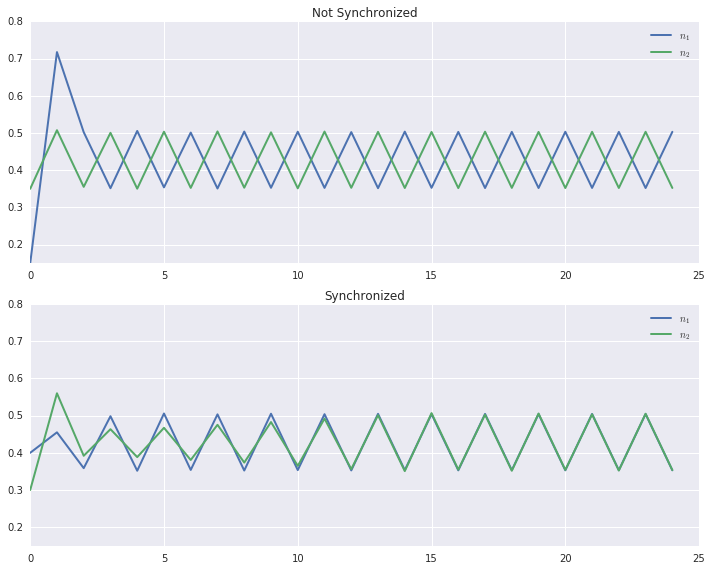

In [96]:
# Create figure
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

plot_timeseries(0.15, 0.35, ax=ax[0])
plot_timeseries(0.4, 0.3, ax=ax[1])

ax[0].set_title("Not Synchronized")
ax[1].set_title("Synchronized")

fig.tight_layout()


## Attraction Basis

We write a short function below that creates a matrix that contains integers that represent the number of periods until the two processes synchronize (if they ever do).

In [97]:
def create_attraction_basis(s1=0.5, theta=2.5, delta=0.7, rho=0.2, npts=250):
    # Create the model and a unit range with npts
    model = MSGSync(s1, theta, delta, rho)
    unit_range = np.linspace(0.0, 1.0, npts)

    # Allocate space to store time to sync
    time_2_sync = np.empty((npts, npts), dtype=int)
    # Iterate over initial conditions
    for (i, n1_0) in enumerate(unit_range):
        for (j, n2_0) in enumerate(unit_range):
            synchronized, pers_2_sync = model.pers_till_sync(n1_0, n2_0)
            time_2_sync[i, j] = pers_2_sync

    return time_2_sync


In [113]:
def plot_attraction_basis(s1=0.5, theta=2.5, delta=0.7, rho=0.2, npts=250, ax=None):
    if ax is None:
        fig, ax = plt.subplots()

    # Create attraction basis
    unitrange = np.linspace(0, 1, npts)
    ab = create_attraction_basis(s1, theta, delta, rho, npts)
    cf = ax.contourf(unitrange, unitrange, ab, cmap="viridis")

    return ab, cf


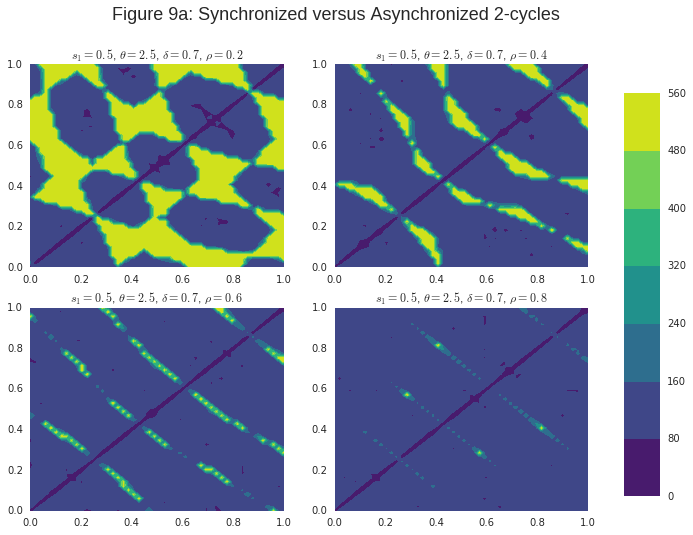

In [134]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

params = [[0.5, 2.5, 0.7, 0.2],
          [0.5, 2.5, 0.7, 0.4],
          [0.5, 2.5, 0.7, 0.6],
          [0.5, 2.5, 0.7, 0.8]]

ab0, cf0 = plot_attraction_basis(*params[0], npts=50, ax=ax[0, 0])
ab1, cf1 = plot_attraction_basis(*params[1], npts=50, ax=ax[0, 1])
ab2, cf2 = plot_attraction_basis(*params[2], npts=50, ax=ax[1, 0])
ab3, cf3 = plot_attraction_basis(*params[3], npts=50, ax=ax[1, 1])

cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.7])
fig.colorbar(ab0, cax=cbar_ax)

ax[0, 0].set_title(r"$s_1=0.5$, $\theta=2.5$, $\delta=0.7$, $\rho=0.2$")
ax[0, 1].set_title(r"$s_1=0.5$, $\theta=2.5$, $\delta=0.7$, $\rho=0.4$")
ax[1, 0].set_title(r"$s_1=0.5$, $\theta=2.5$, $\delta=0.7$, $\rho=0.6$")
ax[1, 1].set_title(r"$s_1=0.5$, $\theta=2.5$, $\delta=0.7$, $\rho=0.8$")

fig.suptitle("Figure 9a: Synchronized versus Asynchronized 2-cycles", x=0.55, y=1.0, size=18)

In [32]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [33]:
model = MSGSync(0.5, 2.5, 0.7, 0.2)